In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity

%matplotlib inline

In [2]:
%run IBMCheck.ipynb

-- Ignoring SSL errors.  This is not recommended --
{'remaining': 6, 'promotional': 0, 'maxUserType': 15}


ibmq_qasm_simulator
ibmqx4
ibmqx2
ibmq_16_melbourne
The best backend is ibmqx4


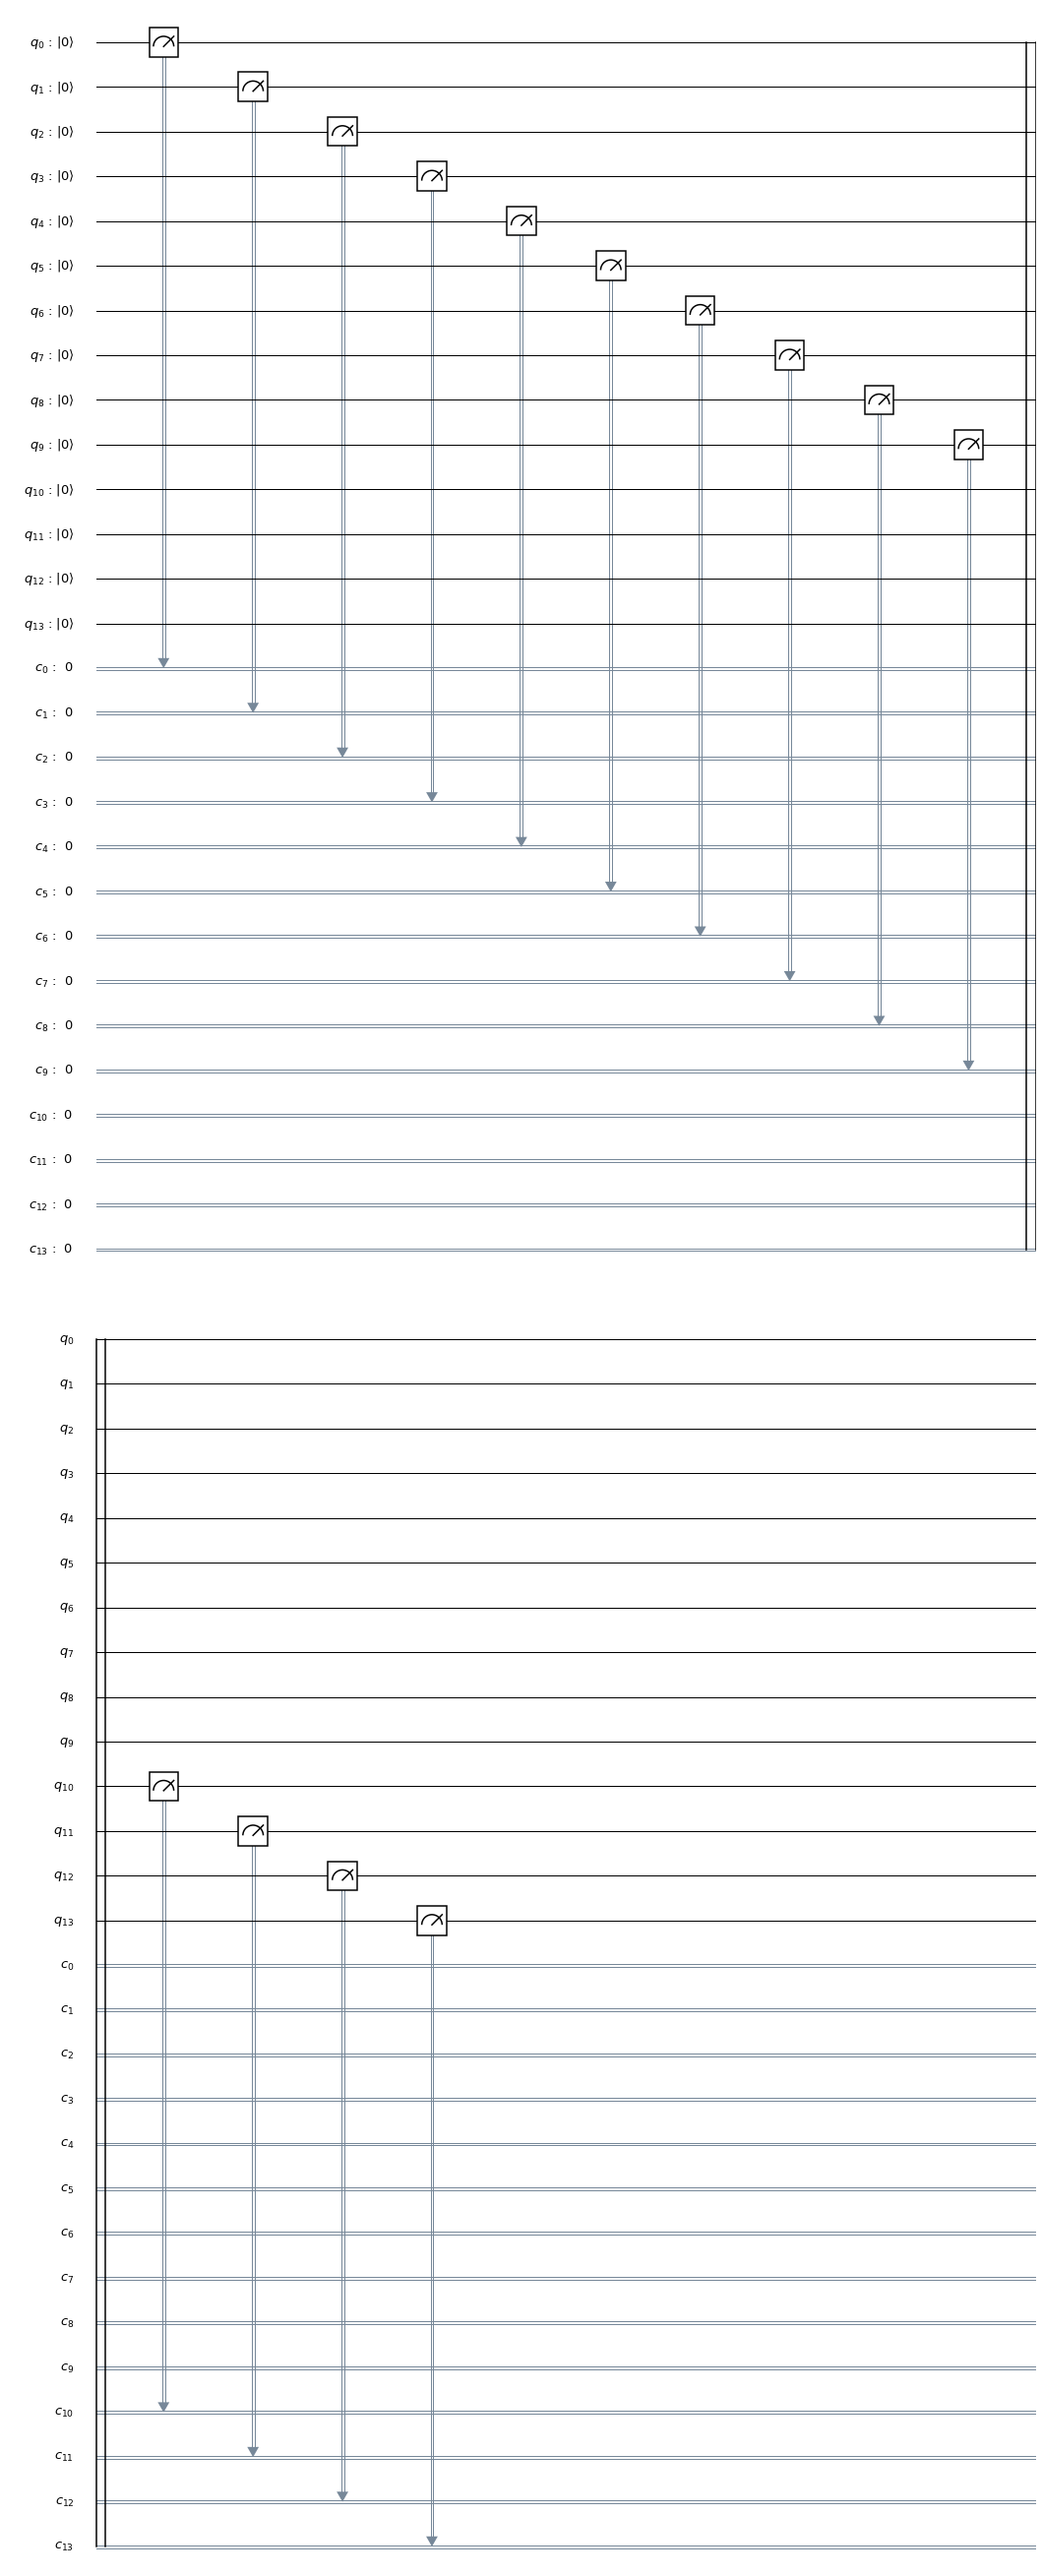

In [3]:
nqubits = 14
mtest = QuantumCircuit(nqubits,nqubits)
#test.x(1)
mtest.measure([i for i in range(nqubits)], [i for i in range(nqubits)])

def eval_measurment_test(numqubits,counts):
    bad=[0 for i in range(numqubits)]
    every=0
    for bits in counts:
        every+=counts[bits]
        for j in range (numqubits): 
            if int(bits[numqubits-j-1])==1: bad[j]+=counts[bits]
    print(bad)
    print(every)
    
mtest.draw(output='mpl')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1000


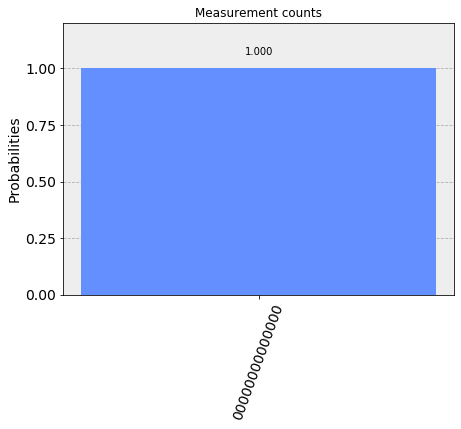

In [4]:
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

from qiskit.providers.aer import QasmSimulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(mtest, simulator,shots=1000).result()
counts = result.get_counts(mtest)

eval_measurment_test(nqubits,counts)

plot_histogram(counts, title='Measurement counts')

In [99]:
from qiskit.tools.monitor import job_monitor

# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 1024
# Maximum number of credits to spend on executions.
max_credits = 1

job_exp = execute(mtest, hws["ibmq_16_melbourne"], shots=shots, max_credits=max_credits)
job_monitor(job_exp)

counts=job_exp.result().get_counts()
eval_measurment_test(nqubits,counts)

Job Status: job has successfully run
[3, 17, 314, 85, 8]
1024


In [101]:
eval_measurment_test(nqubits,counts)

[4, 2, 2, 198, 41, 16, 5, 172, 24, 3, 17, 314, 85, 8]
1024
